## DataSet Source
https://www.glassdoor.com/research/job-market-report-historical/

- Historical information on housing from glassdoor
- Metro areas and most common and well paid jobs over time

## Loading in the data set

In [0]:
# Load in the dataset
import pandas as pd
raw_data = pd.read_csv("glassdoor.csv")
raw_data.head()

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
0,National,Quick Facts,2020-01,U.S. Job Openings,U.S. Job Openings,"5,612,853",-3.1%
1,National,Quick Facts,2020-01,U.S. Median Pay,U.S. Median Pay,"$ 54,430",2.6%
2,Atlanta,Quick Facts,2020-01,Metro Job Openings,Metro Job Openings,"108,545",-12.5%
3,Atlanta,Quick Facts,2020-01,U.S. Job Openings,U.S. Job Openings,"5,612,853",-3.1%
4,Atlanta,Quick Facts,2020-01,Metro Median Pay,Metro Median Pay,"$ 56,521",2.9%


## Now lets look at what we got

In [0]:
# Setup charting library
import matplotlib.pyplot as plt
%matplotlib inline

### Quick Facts

In [0]:
# Quick Facts
quickFacts_raw = raw_data[raw_data['Dimension Type']=='Quick Facts']

# Grab the two types of 'quick facts data'
quickFacts_jobOpenings = quickFacts_raw[ quickFacts['Dimension']=='Metro Job Openings']
quickFacts_jobPay = quickFacts_raw[ quickFacts['Dimension']=='Metro Median Pay']

quickFacts_jobPay.head()


,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
4,Atlanta,Quick Facts,2020-01,Metro Median Pay,Metro Median Pay,"$ 56,521",2.9%
8,New York City,Quick Facts,2020-01,Metro Median Pay,Metro Median Pay,"$ 65,990",3.6%
12,Los Angeles,Quick Facts,2020-01,Metro Median Pay,Metro Median Pay,"$ 64,277",3.5%
16,Philadelphia,Quick Facts,2020-01,Metro Median Pay,Metro Median Pay,"$ 57,719",2.0%
20,Houston,Quick Facts,2020-01,Metro Median Pay,Metro Median Pay,"$ 57,690",3.3%


In [0]:
# Lets look at types
quickFacts_jobPay.dtypes

Metro             object
Dimension Type    object
Month             object
Dimension         object
Measure           object
Value             object
YoY               object
dtype: object

In [0]:
# Switch them to propper types
import re
def cleanNumber (num): return re.sub("[^0-9\.-]", "", str(num))

valueColCleaned = quickFacts_jobPay['Value'].apply( cleanNumber ).values
quickFacts_jobPay.insert(4, "Average Salary", valueColCleaned )
quickFacts_jobPay = quickFacts_jobPay.astype({'Average Salary' : float})

valueColCleaned = quickFacts_jobOpenings['Value'].apply( cleanNumber ).values
quickFacts_jobOpenings.insert(4, "Job Openings", valueColCleaned )
quickFacts_jobOpenings = quickFacts_jobOpenings.astype({'Job Openings' : float})

quickFacts_jobPay.head()

,Metro,Dimension Type,Month,Dimension,Average Salary,Measure,Value,YoY
4,Atlanta,Quick Facts,2020-01,Metro Median Pay,56521.0,Metro Median Pay,"$ 56,521",2.9%
8,New York City,Quick Facts,2020-01,Metro Median Pay,65990.0,Metro Median Pay,"$ 65,990",3.6%
12,Los Angeles,Quick Facts,2020-01,Metro Median Pay,64277.0,Metro Median Pay,"$ 64,277",3.5%
16,Philadelphia,Quick Facts,2020-01,Metro Median Pay,57719.0,Metro Median Pay,"$ 57,719",2.0%
20,Houston,Quick Facts,2020-01,Metro Median Pay,57690.0,Metro Median Pay,"$ 57,690",3.3%


In [0]:
# Lets look at types again
quickFacts_jobOpenings.dtypes

Metro              object
Dimension Type     object
Month              object
Dimension          object
Job Openings      float64
Measure            object
Value              object
YoY                object
dtype: object

(50000, 80000)

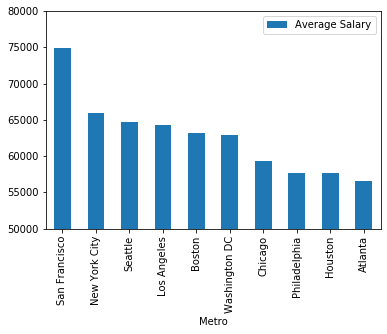

In [0]:
# Do ploting of Salary information

quickFacts_jobPay = quickFacts_jobPay.sort_values("Average Salary", ascending=False)

plot = quickFacts_jobPay.plot.bar(x='Metro', y='Average Salary')
plot.set_ylim(50000, 80000)

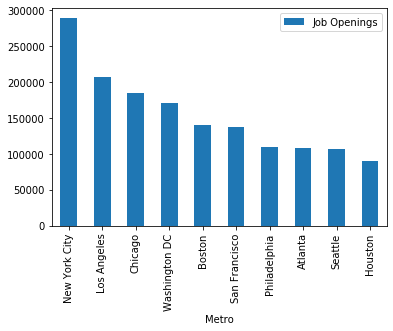

In [0]:
# Do ploting of Job Opening information

quickFacts_jobOpenings = quickFacts_jobOpenings.sort_values("Job Openings", ascending=False)

plot = quickFacts_jobOpenings.plot.bar(x='Metro', y='Job Openings')

### Base Pay over Time

In [0]:
# Base Pay
timeseries_raw = raw_data[raw_data['Dimension Type']=='Timeseries']
medianBasePay_raw = timeseries_raw[ timeseries_raw['Measure'] == 'Median Base Pay']

medianBasePay_raw.head()


,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
1439,U.S.,Timeseries,2020-01,Metro Median Base Pay,Median Base Pay,54430,NaN
1440,U.S.,Timeseries,2019-12,Metro Median Base Pay,Median Base Pay,54500.33333,NaN
1441,U.S.,Timeseries,2019-11,Metro Median Base Pay,Median Base Pay,54336.66667,NaN
1442,U.S.,Timeseries,2019-10,Metro Median Base Pay,Median Base Pay,54228.66667,NaN
1443,U.S.,Timeseries,2019-09,Metro Median Base Pay,Median Base Pay,54090.33333,NaN


In [0]:
# DataTypes
medianBasePay_raw = medianBasePay_raw.astype({'Value' : float})
medianBasePay_raw.dtypes

Metro              object
Dimension Type     object
Month              object
Dimension          object
Measure            object
Value             float64
YoY                object
dtype: object

(40000, 70000)

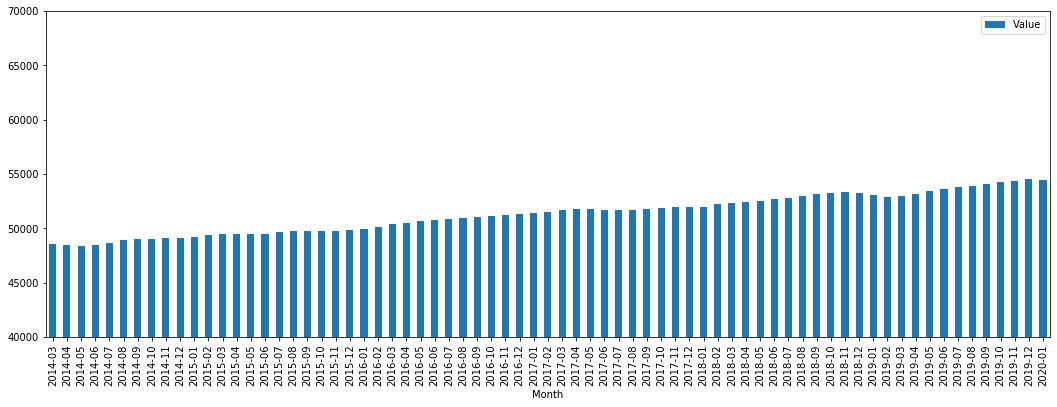

In [0]:
# Charting average pay over time

basePay_USTotal = medianBasePay_raw[ medianBasePay_raw['Metro'] == 'U.S.' ]
basePay_USTotal = basePay_USTotal.sort_values("Month", ascending=True)

plot = basePay_USTotal.plot.bar(x='Month', y='Value',figsize=(18,6))
plot.set_ylim(40000, 70000)

(45000, 70000)

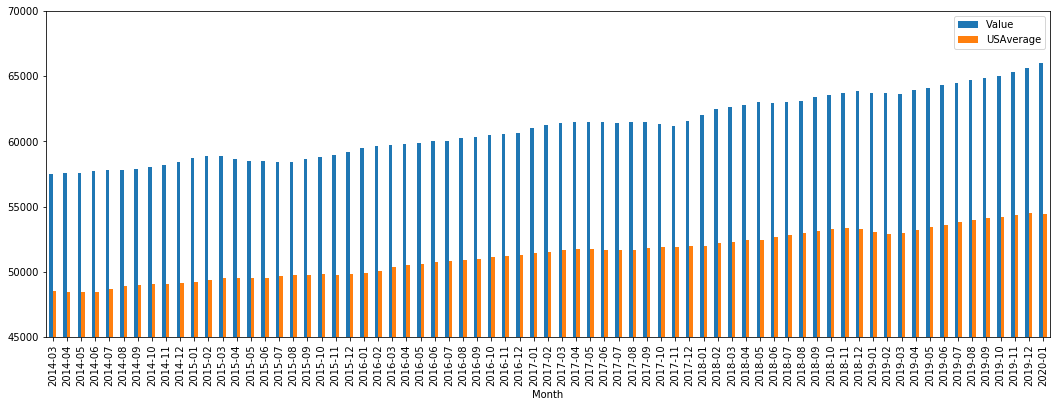

In [0]:
# Charting pay over time for NYC vs USA Average

basePay_NYCTotal = medianBasePay_raw[ medianBasePay_raw['Metro'] == 'New York City' ]
basePay_NYCTotal = basePay_NYCTotal.sort_values("Month", ascending=True)

basePay_NYCTotal.insert(4, "USAverage", basePay_USTotal["Value"].values)

plot = basePay_NYCTotal.plot(kind= 'bar', x='Month', y=['Value', 'USAverage'], figsize=(18,6))
plot.set_ylim(45000, 70000)

## Lets answer some questions with data!

### What is the best city to be a data scientist at?
Figure out where data scientists are paid the most and where the profession is growwing the fastest

In [0]:
# Get data scientist job information for current month, lets look at right now first

jobTitle_raw = raw_data[raw_data['Dimension Type']=='Job Title']
dataScientist_raw = jobTitle_raw[ jobTitle_raw['Dimension'] == 'Data Scientist']

# Transform type to be float

dataScientist_cleaned = dataScientist_raw['Value'].apply( cleanNumber ).values
dataScientist_raw.insert(4, "Average Salary", dataScientist_cleaned )
dataScientist_raw = dataScientist_raw.astype({'Average Salary' : float})

# Check data
dataScientist_raw.head()

,Metro,Dimension Type,Month,Dimension,Average Salary,Measure,Value,YoY
61,National,Job Title,2020-01,Data Scientist,97652.0,Median Base Pay,"$ 97,652",1.6%
145,Atlanta,Job Title,2020-01,Data Scientist,105001.0,Median Base Pay,"$ 105,001",1.9%
229,New York City,Job Title,2020-01,Data Scientist,118464.0,Median Base Pay,"$ 118,464",2.6%
313,Los Angeles,Job Title,2020-01,Data Scientist,122011.0,Median Base Pay,"$ 122,011",2.6%
397,Philadelphia,Job Title,2020-01,Data Scientist,104963.0,Median Base Pay,"$ 104,963",1.0%


(90000, 150000)

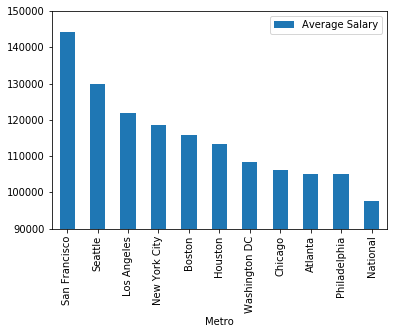

In [0]:
# Chart data scientist at various locations

dataScientist_raw = dataScientist_raw.sort_values("Average Salary", ascending=False)

plot = dataScientist_raw.plot.bar(x='Metro', y='Average Salary')
plot.set_ylim(90000, 150000)

In [0]:
# Where is it growing the fastest?

# Transform YOY data to be float

dataScientist_cleaned = dataScientist_raw['YoY'].apply( cleanNumber ).values
dataScientist_raw.insert(4, "YoY Growth", dataScientist_cleaned )
dataScientist_raw = dataScientist_raw.astype({'YoY Growth' : float})

# Check data
dataScientist_raw.head()

,Metro,Dimension Type,Month,Dimension,YoY Growth,Average Salary,Measure,Value,YoY
649,San Francisco,Job Title,2020-01,Data Scientist,2.9,144218.0,Median Base Pay,"$ 144,218",2.9%
565,Seattle,Job Title,2020-01,Data Scientist,1.6,129929.0,Median Base Pay,"$ 129,929",1.6%
313,Los Angeles,Job Title,2020-01,Data Scientist,2.6,122011.0,Median Base Pay,"$ 122,011",2.6%
229,New York City,Job Title,2020-01,Data Scientist,2.6,118464.0,Median Base Pay,"$ 118,464",2.6%
817,Boston,Job Title,2020-01,Data Scientist,2.3,115763.0,Median Base Pay,"$ 115,763",2.3%


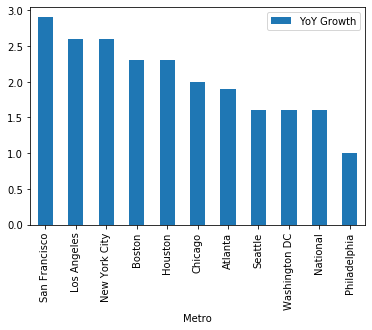

In [0]:
# Chart Growth 

dataScientist_raw = dataScientist_raw.sort_values("YoY Growth", ascending=False)

plot = dataScientist_raw.plot.bar(x='Metro', y='YoY Growth')

In [0]:
# Finaly, lets extrapolate basted on current growth rates across the next few years

oneYearSalary = dataScientist_raw['Average Salary'] * ( 1 + (dataScientist_raw['YoY Growth'])/100 )
twoYearSalary = dataScientist_raw['Average Salary'] * ( ( 1 + (dataScientist_raw['YoY Growth'])/100 ) ** 2 ) 
threeYearSalary = dataScientist_raw['Average Salary'] * ( ( 1 + (dataScientist_raw['YoY Growth'])/100 ) ** 3 )

dataScientist_raw.insert(4, "Salary in 1 year", oneYearSalary )
dataScientist_raw.insert(4, "Salary in 2 years", twoYearSalary )
dataScientist_raw.insert(4, "Salary in 3 years", threeYearSalary )

(90000, 180000)

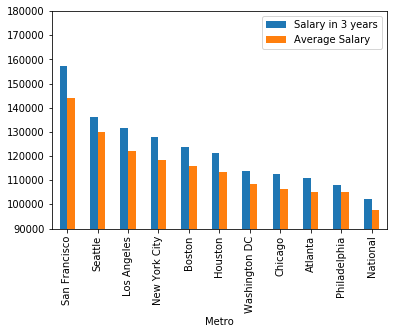

In [0]:
# Chart future value ( projected )

dataScientist_raw = dataScientist_raw.sort_values("Salary in 3 years", ascending=False)

plot = dataScientist_raw.plot.bar(x='Metro', y=['Salary in 3 years','Average Salary'] )
plot.set_ylim(90000, 180000)

### Most likely city to get a job at

Lets see how number of jobs are changin over time in different cities


In [0]:
# Find YOY growth / loss in jobs across cities

jobOpenings = raw_data[raw_data['Dimension Type']=='Quick Facts']
jobOpenings = jobOpenings[ jobOpenings['Dimension'] == 'Metro Job Openings']

# Transform type to be float

jobOpenings_cleanNumber = jobOpenings['Value'].apply( cleanNumber ).values
jobOpenings_cleanChange = jobOpenings['YoY'].apply( cleanNumber ).values

jobOpenings.insert(4, "Open Jobs", jobOpenings_cleanNumber )
jobOpenings = jobOpenings.astype({'Open Jobs' : float})

jobOpenings.insert(4, "YoY Change", jobOpenings_cleanChange )
jobOpenings = jobOpenings.astype({'YoY Change' : float})

# Check data
jobOpenings.head()

,Metro,Dimension Type,Month,Dimension,YoY Change,Open Jobs,Measure,Value,YoY
2,Atlanta,Quick Facts,2020-01,Metro Job Openings,-12.5,108545.0,Metro Job Openings,"108,545",-12.5%
6,New York City,Quick Facts,2020-01,Metro Job Openings,-4.6,288813.0,Metro Job Openings,"288,813",-4.6%
10,Los Angeles,Quick Facts,2020-01,Metro Job Openings,-1.3,207092.0,Metro Job Openings,"207,092",-1.3%
14,Philadelphia,Quick Facts,2020-01,Metro Job Openings,-1.3,109104.0,Metro Job Openings,"109,104",-1.3%
18,Houston,Quick Facts,2020-01,Metro Job Openings,-7.0,89578.0,Metro Job Openings,"89,578",-7.0%


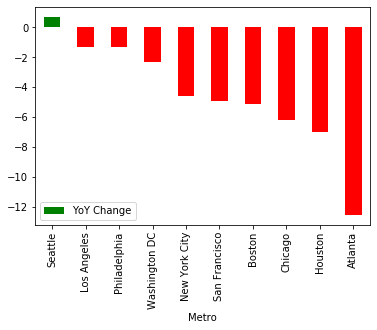

In [0]:
# Lets see how number of open jobs are changing across the US

jobOpenings = jobOpenings.sort_values("YoY Change", ascending=False)

plot = jobOpenings.plot.bar(x='Metro', y='YoY Change', color = (jobOpenings['YoY Change'] > 0 ).map({True: 'g', False: 'r'}))

In [0]:
# Lets try to extrapolate this out a few years and see opening if things stay at this rate


oneYearJobs = jobOpenings['Open Jobs'] * ( 1 + (jobOpenings['YoY Change'])/100 )
twoYearJobs = jobOpenings['Open Jobs'] * ( ( 1 + (jobOpenings['YoY Change'])/100 ) ** 2 ) 
threeYearJobs = jobOpenings['Open Jobs'] * ( ( 1 + (jobOpenings['YoY Change'])/100 ) ** 3 )

jobOpenings.insert(4, "Jobs in 1 year", oneYearJobs )
jobOpenings.insert(4, "Jobs in 2 years", twoYearJobs )
jobOpenings.insert(4, "Jobs in 3 years", threeYearJobs )

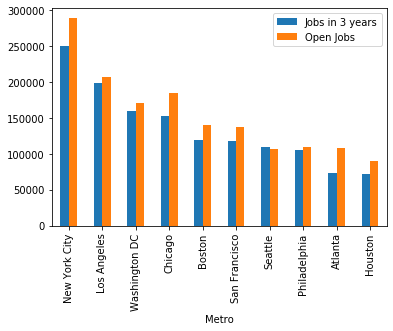

In [0]:
# in three years, if the rate stays the exact same

jobOpenings = jobOpenings.sort_values("Jobs in 3 years", ascending=False)

plot = jobOpenings.plot.bar(x='Metro', y=['Jobs in 3 years','Open Jobs'] )